## Section 06: Transformer Building Blocks
Positional encoding happens at the start of both inputs (embeddings) of the encoder and decoder parts of the transformer model. The encoder takes in a sequence of words and converts it into a fixed-length representation, called the *encoding*. This encoding contains information about the input sequence that is useful for the task the model is being used for. The decoder then takes in this encoding and generates a new sequence of words (the output, in this case a translation). The decoder uses the encoding to understand the context of the input sequence and generate a new sequence that is relevant to the input. In other words, the encoder processes the input and creates an internal representation, which is then passed to decoder, which combines that internal representation to the input in order to generate the output.

More specifically, the encoder is a stack of layers that processes the input sequence one token (such as a word) at a time. Each layer in the encoder applies a *self-attention* mechanism to the input, which allows the model to weigh the importance of different parts of the input sequence and create the encoding. The self-attention (multi-head) mechanism computes the relationships between each token in the input sequence and all other tokens, and assigns a weight to each token based on its relevance to the other tokens. These weights are used to create the encoding, which is a summary of the input sequence that captures its most important information.

The decoder is also a stack of layers, but it works a little differently from the encoder. In addition to processing the encoding, the decoder also takes in a sequence of tokens, called the "target" sequence. The goal of the decoder is to generate the target sequence, one token at a time, by using the encoding to understand the context of the input and the tokens already generated. Like the encoder, the decoder also applies a self-attention mechanism, but this time it is used to weigh the importance of the target sequence as well as the encoding.


### Self-attention and feed-forward sublayers
As mentioned, the encoder is composed of a stack of 6 identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise fully connected feed-forward network (see Section 1). The decoder is also composed of a stack of 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack.

The self-attention layers are responsible for creating the context vector by computing the importance or relevance of each word in the sentence in relation to all other words in the sentence. The attention mechanism allows the model to "pay attention" to different parts of the input sentence when computing the context vector, and "remember" what it has seen so far in the input. The feed-forward layers are responsible for transforming the context vector into a more compact and meaningful representation. Each layer applies a non-linear activation function, such as ReLU, followed by linear transformation of the input using learned weights and biases. The output of the final layer is the context vector.

The context vector is a fixed-length vector of 512 dimensions that condenses the information from the input sentence into a single vector. This vector is then passed as input to the decoder, which uses it along with the attention mechanism to generate the output sentence, word by word. It is important to note that the context vector is not an exact representation of the input sentence, it is a learned embedding that contains information about the meaning and context of the input sentence in a high dimensional space (batch size * max sequence length). One important property of the transformer models is that the encoder part of the model is capable to encode any input sequence, not only a sentence, this gives flexibility to be used for a wide range of tasks, such as image captioning, text classification and more.


### The attention function
The self-attention mechanism is a key component of the transformer model and is used in both the encoder and decoder. It allows the model to weigh the importance of different parts of the input sequence when creating the encoding or generating the target sequence.

The self-attention mechanism works by computing the relationships between each token in the input or target sequence and all other tokens. Specifically, for each token in the sequence, the mechanism calculates a set of attention scores, one for each token in the sequence. These scores represent the "attention" that the model should give to each token when processing the input or generating the output. Because word embeddings are passed as inputs together with the positional encoding matrix, the self-attention layer of the encoder and decoder can weigh the importance of each token in the sequence based on both its content and its position in the input sequence.

An **attention function** can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key.


### Attention Scores and Attention Weight.
The **attention scores** are computed using three sets of parameters, called the **query**, **key**, and **value** matrices. The query matrix is used to represent the input or target token, the key matrix is used to represent all other tokens in the sequence, and the value matrix is used to represent the information that the model should extract from each token. The attention score is a scalar value calculated for each token in the input sequence, which represents the "attention" that the model should give to that token when creating the encoding or generating the output. The attention scores are calculated by taking the dot product of the query vector for a given token and the key vector for all other tokens in the sequence. 

Once the attention scores are computed, they are used to weight the importance of each token in the sequence when creating the encoding or generating the output by computing the The **attention weights**. The attention weights are also a set of scalar values, one for each token in the sequence, obtained by applying a **softmax** function to the attention scores, resulting in a probability distribution. This distribution tells the model how much attention to give to each token in the input sequence, by taking a weighted sum of the values vector. Softmax is a common function in ML which converts any real-valued input into a probability distribution (between 0 and 1; i.e., it maps each element of a vector to a value between 0 and 1, such that the sum of all elements in the output vector is equal to 1; Figure 2). 

In the self-attention mechanism, the key, the value, and the query inputs are typically represented by the same set of vectors, which correspond to the tokens in the input sequence, as it makes the computation more efficient and reducing the number of parameters to learn. The attention mechanism can be used multiple times in each layer of encoder/decoder and it can be applied to different combinations of the inputs like across different layers and time steps. 


### Residual Connections.
**Residual connection** refers to the technique of adding the input to a layer to the output of that layer before passing it to the next layer. The idea behind this is to allow the gradients to flow more easily through the network and to make the training of very deep networks more feasible.

A residual connection, also known as a *skip connection*, allows the gradients to bypass one or more layers and reach earlier layers. This makes it possible to train much deeper networks without the vanishing gradients problem. The residual connection also allows the model to learn the identity function, which is useful for preserving the information from the input to the output.

In this NN, there is a residual connection around each of the two sublayers, which means that the inputs to the sublayers are added to the outputs of the sublayers before passing it to the next sublayer or layer. This technique allows the model to preserve the information from the input and make the training of very deep networks more feasible.


### Multi-Head Attention
In Multi-head attention, multiple self-attention mechanisms (heads) are applied in parallel to the input sequence, each with their own set of query, key and value matrices. The output of each head is then concatenated and projected back to a lower-dimensional space using a weight matrix, called the output projection.

The main motivation for using multi-head attention is that it allows the model to attend to different parts of the input sequence with different heads and then combine those representations together to create the encoding or the target sequence. This can help the model capture different types of relationships between the tokens in the input, such as translations, dependencies, or coreferences, leading to better performance in a variety of tasks.

The advantage of using multiple attention heads is that each head can focus on different aspects of the input sequence, making it possible for the model to learn more fine-grained representations of the input. This can in turn, lead to better performance on tasks such as language translation, where there may be many different types of relationships between the words in the source and target languages. Additionally, having multiple attention heads also allows the model to attend to more than one position of the input at a time and therefore able to capture more complex patterns in the data.

In summary, multi-head attention is a variant of self-attention in which multiple self-attention mechanisms are applied in parallel to the input sequence. This allows the model to attend to different parts of the input sequence with different heads, which can help the model learn more fine-grained representations of the input and improve its performance on a variety of tasks.


### Building the sublayers.
Both encoder and decoder have a multi-head attention block at the beginning and a feed forward block at the end. However, the decoder has one additional self-attention layer before the feedforward layer. We will create each building block as separate submodels (layers) and later combine them into a bigger model.

Our sequence-to-sequence Transformer consists of a TransformerEncoder and a TransformerDecoder chained together. To make the model aware of word order, we also use the PositionalEmbedding layer created in the previous Section.

The source sequence will be passed to the TransformerEncoder, which will produce a new representation of it. This new representation will then be passed to the TransformerDecoder, together with the target sequence so far (target words 0 to N). The TransformerDecoder will then seek to predict the next words in the target sequence (N+1 and beyond).

A key detail that makes this possible is causal masking (see method get_causal_attention_mask() on the TransformerDecoder). The TransformerDecoder sees the entire sequences at once, and thus we must make sure that it only uses information from target tokens 0 to N when predicting token N+1 (otherwise, it could use information from the future, which would result in a model that cannot be used at inference time).

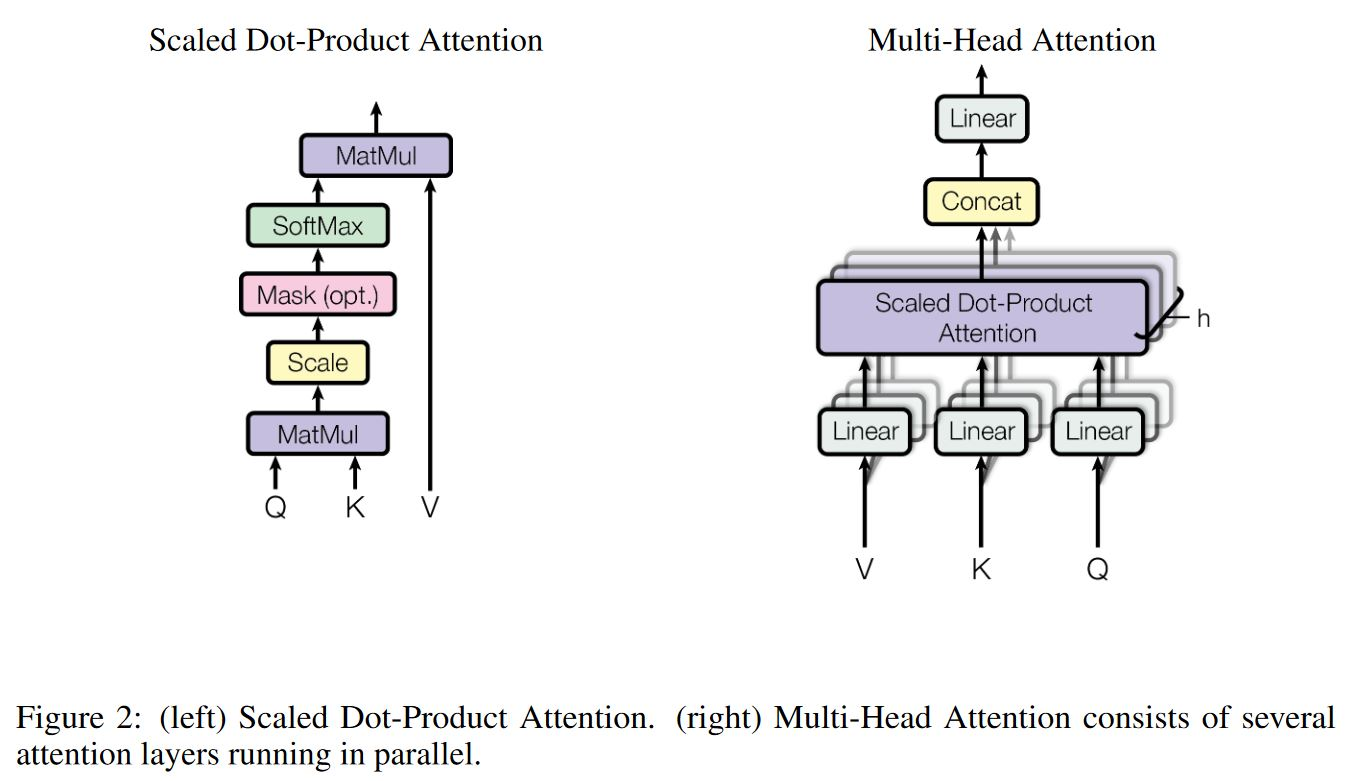

In [1]:
from IPython.display import Image
Image(filename='Vaswani_et_al_2017_Fig_2.JPG') 

We now define a function called *self_attention* that creates a self-attention layer. The function creates several layers such as inputs, attention, norm, and add, and connects them using the functional API of the library. A functional API is a way of defining a neural network in TensorFlow (or other deep learning libraries) where the layers are treated as functions that can be applied to the tensors. It is an alternative to the Sequential API which is a linear stack of layers, where layers are added one by one. The functional API is more flexible than the Sequential API and it allows to build more complex models, like Multi-input and Multi-output models, Shared layers and directed acyclic graph of layers etc. When creating a model using the functional API, the layers are defined separately from the inputs and outputs, and then connected together using the functional operations. It's like building a neural network using the building blocks.

The inputs are passed to the *MultiHeadAttention* layer, which performs the self-attention operation. The attention output is then passed to the *LayerNormalization* layer, which normalizes the output and applies *residual connection* (see above) by adding the input to the attention output.

The function defined below is generic for both encoder and decoder. The decoder will set the option use_mask=True to apply causal mask to the input. As a first thing, we create the mask for the decoder using the function below.

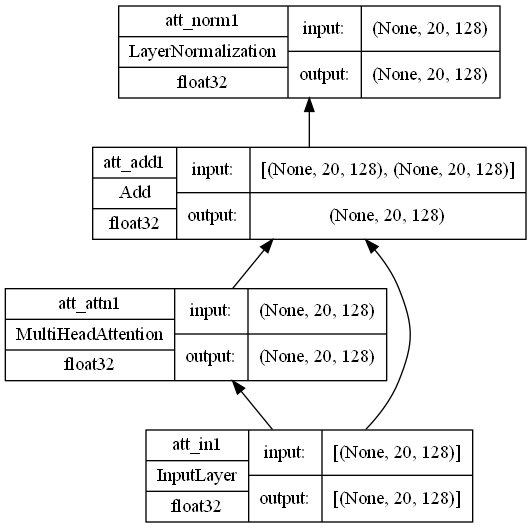

In [4]:
import tensorflow as tf
 
def self_attention(input_shape, prefix="att", mask=False, **kwargs):
    """Self-attention layers at transformer encoder and decoder. Assumes its
    input is the output from positional encoding layer.
 
    Args:
        prefix (str): The prefix added to the layer names
        masked (bool): whether to use causal mask. Should be False on encoder and
                       True on decoder. When True, a mask will be applied such that
                       each location only has access to the locations before it.
    """
    # create layers
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in1")
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_attn1", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm1")
    add = tf.keras.layers.Add(name=f"{prefix}_add1")
    # functional API to connect input to output
    attout = attention(query=inputs, value=inputs, key=inputs,
                       use_causal_mask=mask)
    outputs = norm(add([inputs, attout]))
    # create model and return
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f"{prefix}_att")
    return model
 
seq_length = 20
key_dim = 128
num_heads = 8
 
model = self_attention(input_shape=(seq_length, key_dim),
                       num_heads=num_heads, key_dim=key_dim)
tf.keras.utils.plot_model(model, "section_06_figure_01_self-attention.png",
                          show_shapes=True, show_dtype=True, show_layer_names=True,
                          rankdir='BT', show_layer_activations=True)

In [3]:
#def get_causal_attention_mask(input_shape):
#    batch_size, sequence_length = input_shape[0], input_shape[1]
#    i = tf.range(sequence_length)[:, tf.newaxis]
#    j = tf.range(sequence_length)
#    mask = tf.cast(i >= j, dtype="int32")
#    mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
#    mult = tf.concat(
#        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
#        axis=0,
#    )
#    return tf.tile(mask, mult)

In the decoder, there is a cross-attention model that takes input from the self-attention model as well as the encoder. In this case, the value and key are the output from the encoder (i.e., *context*) whereas the query is the output from the self-attention model (i.e., *input*).
The function creates two input layers, one for the input and one for the context, a multi-head attention layer, a normalization layer, and an add layer. These layers are then connected in a functional API and the final output is returned as a model. This creates a cross-attention mechanism, which allows the decoder to attend to the encoder's final output. 
At the high level, it is based on what the encoder understands about the context of the source sentence, and takes the partial sentence at the decoder’s input as the query (which can be empty), to predict how to complete the sentence. This is the only difference from the self-attention model; hence the code is very similar. Note that there are two inputs in this model, one for the context and another for the input from self-attention.

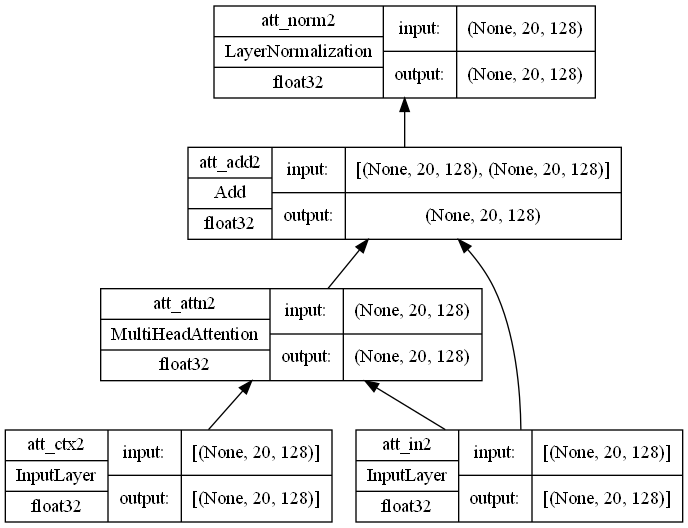

In [8]:
import tensorflow as tf
 
def cross_attention(input_shape, context_shape, prefix="att", **kwargs):
    """Cross-attention layers at transformer decoder. Assumes its
    input is the output from positional encoding layer at decoder
    and context is the final output from encoder.
 
    Args:
        prefix (str): The prefix added to the layer names
    """
    # create layers
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32',
                                    name=f"{prefix}_ctx2")
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in2")
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_attn2", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm2")
    add = tf.keras.layers.Add(name=f"{prefix}_add2")
    # functional API to connect input to output
    attout = attention(query=inputs, value=context, key=context)
    outputs = norm(add([attout, inputs]))
    # create model and return
    model = tf.keras.Model(inputs=[(context, inputs)], outputs=outputs,
                           name=f"{prefix}_cross")
    return model
 
seq_length = 20
key_dim = 128
num_heads = 8
 
model = cross_attention(input_shape=(seq_length, key_dim),
                        context_shape=(seq_length, key_dim),
                        num_heads=num_heads, key_dim=key_dim)
tf.keras.utils.plot_model(model, "section_06_figure_02_cross-attention.png",
                          show_shapes=True, show_dtype=True, show_layer_names=True,
                          rankdir='BT', show_layer_activations=True)

Finally, there are feed forward models at the output of both encoder and decoder. The function creates an input layer, two dense layers, a dropout layer, and an add layer. The dense layers are used to create a feed-forward neural network with ReLU activation function for the first dense layer. The dropout layer is used to prevent overfitting. These layers are then connected in a functional API and the final output is returned as a model. The add layer is used to add the input and the feed-forward output, the normalization layer is used to normalize the output.

Two words about ReLU: The rectified linear unit (ReLU) activation function is a widely used activation function in neural networks. It is defined as f(x) = max(0, x), where x is the input to a neuron. In other words, the function returns 0 if the input is negative, and the input value if the input is positive.

The main advantage of using the ReLU activation function is that it is computationally efficient. It is also less computationally expensive than other types of activation functions such as sigmoid or tanh. Additionally, ReLU activation function is known to alleviate the vanishing gradient problem, which is a common problem in deep neural networks. The vanishing gradient problem occurs when the gradients of the parameters become very small during the backpropagation process, which makes it difficult to update the parameters. The ReLU activation function's derivative is 1 for positive inputs and 0 for negative inputs, which can solve the vanishing gradient problem.

In summary, ReLU activation function is a simple, fast and effective function that introduce non-linearity in the model, and it's widely used in deep learning for this reason.

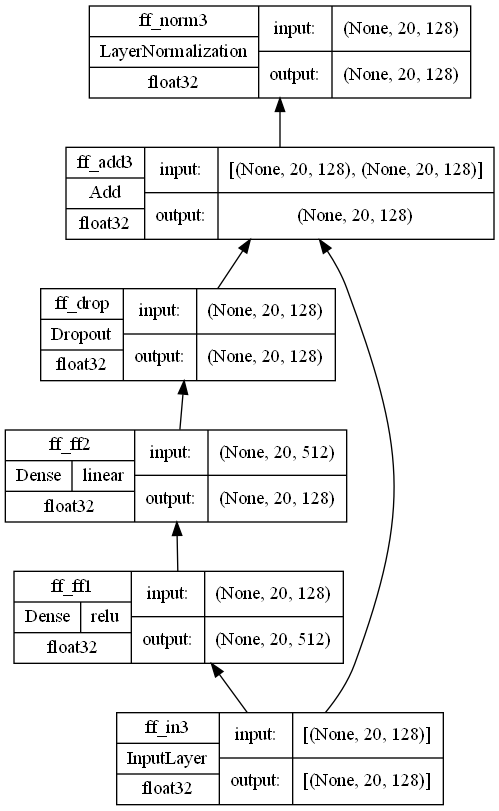

In [9]:
import tensorflow as tf
 
def feed_forward(input_shape, model_dim, ff_dim, dropout=0.1, prefix="ff"):
    """Feed-forward layers at transformer encoder and decoder. Assumes its
    input is the output from an attention layer with add & norm, the output
    is the output of one encoder or decoder block
 
    Args:
        model_dim (int): Output dimension of the feed-forward layer, which
                         is also the output dimension of the encoder/decoder
                         block
        ff_dim (int): Internal dimension of the feed-forward layer
        dropout (float): Dropout rate
        prefix (str): The prefix added to the layer names
    """
    # create layers
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in3")
    dense1 = tf.keras.layers.Dense(ff_dim, name=f"{prefix}_ff1", activation="relu")
    dense2 = tf.keras.layers.Dense(model_dim, name=f"{prefix}_ff2")
    drop = tf.keras.layers.Dropout(dropout, name=f"{prefix}_drop")
    add = tf.keras.layers.Add(name=f"{prefix}_add3")
    # functional API to connect input to output
    ffout = drop(dense2(dense1(inputs)))
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm3")
    outputs = norm(add([inputs, ffout]))
    # create model and return
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f"{prefix}_ff")
    return model
 
seq_length = 20
key_dim = 128
ff_dim = 512
 
model = feed_forward(input_shape=(seq_length, key_dim),
                     model_dim=key_dim, ff_dim=ff_dim)
tf.keras.utils.plot_model(model, "section_06_figure_03_feedforward.png",
                          show_shapes=True, show_dtype=True, show_layer_names=True,
                          rankdir='BT', show_layer_activations=True)

The model plotted would look like the following. Note that the first Dense layer uses ReLU activation and the second has no activation. A dropout layer is then appended for regularization.

Finally, we save the *PositionalEncoding*, *self_attention*, *cross_attention*, and *feed_forward* layers in the *transformer_building_blocks.py* file to load them later.